**WARNING**: Este notebook puede usar TPU, por favor, activala en Entorno de ejecución > Cambiar tipo de enterno > Acelerador por hardware > TPU

In [ ]:
use_tpu = True

El Notebook está pensado para que pueda correr un solo modelo. 

Por ejemplo: Si queremos correr sólo RoBERTa, tendríamos que correr el punto 1, el 2 y el 2.2.

# **OBJETIVO**: 
Detectar tweets clickbait publicados por medios de comunicación en inglés.

# **1. Análisis Exploratorio de los Datos (EDA)**

---

Anter de implementar diferentes modelos, se procede a una pequeña exploración de los datos. En nuestro caso, tenemos una serie de tweets ya clasificados como "clickbait" y "no-clickbait" (Supervised Learning).

Usaremos la librería *pandas* para tratar los dataset y *matplotlib* para graficar:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

Cargamos en dos *DataFrame* los tweets que usaremos como *training set* y como *test set*.

In [ ]:
train = pd.read_csv('https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_train.csv', index_col=0)
test = pd.read_csv('https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_test.csv', index_col=0)

Veamos qué aspecto tienen:

In [ ]:
train.head(3)

,postMedia,postText,id,targetCaptions,targetParagraphs,targetTitle,postTimestamp,targetKeywords,targetDescription,truthJudgments,truthMean,truthClass,truthMedian,truthMode
0,[],UK’s response to modern slavery leaving victim...,858462320779026432,['modern-slavery-rex.jpg'],['Thousands of modern slavery victims have\xa0...,‘Inexcusable’ failures in UK’s response to mod...,Sat Apr 29 23:25:41 +0000 2017,"modern slavery, Department For Work And Pensio...",“Inexcusable” failures in the UK’s system for ...,"[0.33333333330000003, 0.0, 0.33333333330000003...",0.133333,no-clickbait,0.000000,0.000000
1,[],this is good,858421020331560960,"['In this July 1, 2010 file photo, Dr. Charmai...",['President Donald Trump has appointed the\xa0...,Donald Trump Appoints Pro-Life Advocate as Ass...,Sat Apr 29 20:41:34 +0000 2017,"Americans United for Life, Dr. Charmaine Yoest...",President Donald Trump has appointed pro-life ...,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,clickbait,1.000000,1.000000
2,[],"The ""forgotten"" Trump roast: Relive his brutal...",858368123753435136,"[""President Trump will not attend this year's ...",['When the\xa0White House correspondents’ dinn...,The ‘forgotten’ Trump roast: Relive his brutal...,Sat Apr 29 17:11:23 +0000 2017,"trump whcd, whcd, white house correspondents d...",President Trump won't be at this year's White ...,"[0.33333333330000003, 1.0, 0.33333333330000003...",0.466667,no-clickbait,0.333333,0.333333


In [ ]:
test.head(3)

,id,postMedia,targetCaptions,postText,postTimestamp,targetTitle,targetDescription,targetKeywords,targetParagraphs,truthJudgments,truthClass,truthMedian,truthMode,truthMean
0,858426904239497216,['media/photo_858425825229549568.jpg'],"['Cleveland Browns logo', 'Dec 6, 2015; Clevel...",Johnny Manziel on Browns' No. 1 pick Myles Gar...,Sat Apr 29 21:04:57 +0000 2017,Johnny Manziel Says Top Pick in Draft Myles Ga...,Johnny Manziel approves of the Cleveland ...,"NFL Draft, Football, NFL, AFC North, Cleveland...","[""Johnny Manziel approves of the Cleveland Bro...","[0.0, 0.0, 0.0, 0.0, 0.0]",no-clickbait,0.0,0.0,0.000000
1,858416350540201984,['media/photo_858416342268911616.jpg'],"['Five', 'Guilfoyle', 'Coulter', 'Cain']",Fabio: California Is a 'Mess' Because of Liber...,Sat Apr 29 20:23:01 +0000 2017,Fabio: California Is a 'Mess' Because of Liber...,"Fabio, the Italian-born male model who has ado...",NaN,"['Fabio, the Italian-born male model who has a...","[0.0, 0.0, 0.0, 0.33333333330000003, 0.0]",no-clickbait,0.0,0.0,0.066667
2,858364015260704768,[],[],"""He's been huge for us this year, man.""",Sat Apr 29 16:55:03 +0000 2017,"Jimmy Butler wants to return, hopes Bulls keep...",Bulls guard Jimmy Butler says he wants to rema...,"guards, backcourt, option, contract, Chicago B...","[""CHICAGO -- All-Star swingman Jimmy Butler kn...","[1.0, 1.0, 1.0, 1.0, 1.0]",clickbait,1.0,1.0,1.000000


Y cuántos tweets tenemos:

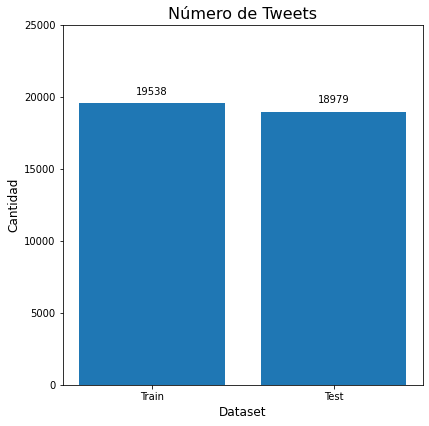

In [ ]:
fig = plt.figure(figsize =(5, 5))
ax = fig.add_axes([0,0,1,1])
langs = ['Train', 'Test']
students = [len(train),len(test)]
ax.bar(langs,students)

plt.title("Número de Tweets", fontsize=16)
plt.xlabel("Dataset", fontsize=12) 
plt.ylabel("Cantidad", fontsize=12)
plt.ylim(0, 25000)  
rects = ax.patches

# Make some labels.
labels = [len(train), len(test)]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 500, label, ha="center", va="bottom"
    )
plt.show()
plt.close()

A continuación, veremos qué tipo de objeto contiene cada columna y cuántas entradas nulas hay para ambos datasets.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19538 entries, 0 to 19537
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postMedia          19538 non-null  object 
 1   postText           19484 non-null  object 
 2   id                 19538 non-null  int64  
 3   targetCaptions     19538 non-null  object 
 4   targetParagraphs   19538 non-null  object 
 5   targetTitle        19538 non-null  object 
 6   postTimestamp      19538 non-null  object 
 7   targetKeywords     12309 non-null  object 
 8   targetDescription  18595 non-null  object 
 9   truthJudgments     19538 non-null  object 
 10  truthMean          19538 non-null  float64
 11  truthClass         19538 non-null  object 
 12  truthMedian        19538 non-null  float64
 13  truthMode          19538 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 2.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18979 entries, 0 to 18978
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18979 non-null  int64  
 1   postMedia          18979 non-null  object 
 2   targetCaptions     18979 non-null  object 
 3   postText           18913 non-null  object 
 4   postTimestamp      18979 non-null  object 
 5   targetTitle        18979 non-null  object 
 6   targetDescription  18055 non-null  object 
 7   targetKeywords     11925 non-null  object 
 8   targetParagraphs   18979 non-null  object 
 9   truthJudgments     18979 non-null  object 
 10  truthClass         18979 non-null  object 
 11  truthMedian        18979 non-null  float64
 12  truthMode          18979 non-null  float64
 13  truthMean          18979 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 2.2+ MB


Parece que falta información en algunas columnas como *postText* o *targetDescription*.
No obstante, como en este caso sólo estamos interesados en las columnas **postText** y **truthClass**, antes de lidiar con los *nulls* reduciremos nuestro dataset a estas dos columnas:

In [ ]:
train = train[['postText', 'truthClass']]
test = test[['postText', 'truthClass']]

Ahora, vamos a ver cuántos *nulls* tenemos:

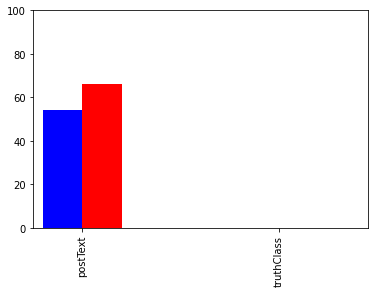

In [ ]:
fig = plt.figure()
plt.title
ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.2
plt.ylim(0, 100) 
train.isnull().sum().plot.bar(color='blue', ax=ax, width=width, position=1)
test.isnull().sum().plot.bar(color='red', ax=ax, width=width, position=0)

Podemos ver que hay 54 entradas vacías en el training set y 66 en el test set para la feature *postText*.

Como desconozco exactamente la información que contiene el resto de columnas y, además, la cantidad de tweets vacíos es muy baja, simplemente eliminamos esos tweets

In [ ]:
train = train.drop(train[train['postText'].isnull()].index)

In [ ]:
test = test.drop(test[test['postText'].isnull()].index)

y comprobamos que ya no tenemos nulls:

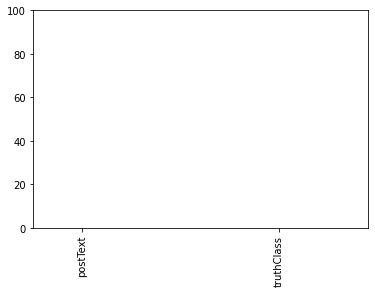

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.2
plt.ylim(0, 100) 
train.isnull().sum().plot.bar(color='blue', ax=ax, width=width, position=1)
test.isnull().sum().plot.bar(color='red', ax=ax, width=width, position=0)

El siguiente paso será comprobar que no hay ningún error en las etiquetas. Es decir, que realmente sólo hay dos etiquetas: "clickbait" y "no-clickbait".

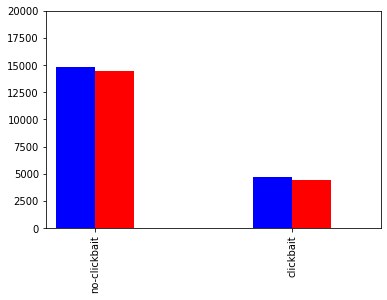

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.2
plt.ylim(0, 20000) 
train['truthClass'].value_counts().plot.bar(color='blue', ax=ax, width=width, position=1)
test['truthClass'].value_counts().plot.bar(color='red', ax=ax, width=width, position=0)

Vemos que efectivamente sólo tenemos 2 etiquetas en una proporción aproximada de 1:3 (clickbait:no-clickbait).

Es importante tener un training set más o menos balanceado para que el modelo no aprenda a predecir una única clase. 

En este caso, el dataset tiene cierto sesgo. Hay varias estrategias para balancear un dataset: *upsampling*, *downsampling*, *resampling*... En esta ocasión, vamos a dotar de diferentes pesos a cada clase, como veremos a la hora de entrenar nuestro modelo.

# **2. Modelos de predicción clickbait**

Después del EDA, estamos listos para entrenar nuestros modelos de predicción.
Para la tarea de clasificación, usaremos un *encoder* basado en *transformers* como BERT (Bidirectional Encoder Representations from Transformers) y una modificación de este como RoBERTa.

De manera muy resumida, para procesar lenguaje necesitamos codificar las palabras en vectores. Hay multitud de *embbedings* capaces de hacerlo. La ventaja de BERT es que además de codificar las palabras, las dota de contexto gracias al mecanismo de atención. BERT abandona la recurrencia de otros modelos recurrentes de codificación como ELMo o ULMFit y se basa en capas de *encoders* de tipo *transformers*. A diferencia de los primeros, BERT es realmente bidireccional mientras que los modelos de recurrencia concatenan la lectura izquierda/derecha derecha/izquierda.


La arquitectura de todos los modelos que siguen es la siguiente:

*Input* --> **ENCODER** --> [CLS] --> **LINEAR LAYER** --> *Sigmoid* --> Output (clase)

Optimizaremos los pesos de la red neuronal partiendo desde unos pesos preentrenados (*fine-tuning*).

Primero, instalamos *transformers* de HuggingFace

In [ ]:
pip install transformers

Cargamos las librerías que necesitamos

In [ ]:
import numpy as np

from transformers import TFBertForSequenceClassification, TFRobertaForSequenceClassification
from transformers import BertTokenizerFast, RobertaTokenizerFast

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 2.1. BERT for sequence classification



**Definición del modelo y de los inputs**

---

Vamos a definir dos funciones:

*crear_inputs* va a coger los DataFrames *train* y *test*, los va a pasar por el TOKENIZER que elijamos y nos va a devolver *train_X*, *train_y*, *validation_X*, *validation_y*, *test_X* y *test_y*.

*crear_clasificador_clickbait* crea una red con la arquitectura:

train_X, train_y, validation_X, validation_y, test_X, test_y --> **BERT** --> [CLS] --> **LINEAR LAYER** --> *Sigmoid* --> Output (clase)

In [ ]:
def crear_inputs(train, test, TOKENIZER, frac_val):
  
  train['code'] = np.where(train['truthClass'] == 'clickbait', 1, 0)
  test['code'] = np.where(test['truthClass'] == 'clickbait', 1, 0)

  validation = train.sample(frac=frac_val, random_state=42)
  train = train.drop(validation.index)

  ## Training set
  encoded_tweets = TOKENIZER(train['postText'].to_list(), 
                             return_tensors='tf', 
                             padding="max_length", 
                             truncation=True)
  train_X = [encoded_tweets['input_ids'], 
             encoded_tweets['token_type_ids'], 
             encoded_tweets['attention_mask']]

  train_y = tf.convert_to_tensor(np.array(train['code']).reshape(len(train['code']),1))

  ## Validation set
  encoded_tweets = TOKENIZER(validation['postText'].to_list(), 
                             return_tensors='tf', 
                             padding="max_length", 
                             truncation=True)
  validation_X = [encoded_tweets['input_ids'], 
             encoded_tweets['token_type_ids'], 
             encoded_tweets['attention_mask']]

  validation_y = tf.convert_to_tensor(np.array(validation['code']).reshape(len(validation['code']),1))


  ## Test set
  encoded_tweets = TOKENIZER(test['postText'].to_list(), 
                             return_tensors='tf', 
                             padding="max_length", 
                             truncation=True)
  test_X =  [encoded_tweets['input_ids'], 
             encoded_tweets['token_type_ids'], 
             encoded_tweets['attention_mask']]

  test_y = tf.convert_to_tensor(np.array(test['code']).reshape(len(test['code']),1))
  
  return train_X, train_y, validation_X, validation_y, test_X, test_y

In [ ]:
def crear_clasificador_clickbait(encoder, loss, optimizer):
  
    ## Definimos los inputs (tamaño máximo 512 por el tokenizer)
    input_ids = layers.Input(shape=(512,), dtype=tf.int32, name='input_ids')            # 512 el máximo para los encoders que estamos usando
    token_type_ids = layers.Input(shape=(512,), dtype=tf.int32, name='token_type_ids')  # 512 el máximo para los encoders que estamos usando
    attention_mask = layers.Input(shape=(512,), dtype=tf.int32, name='attention_mask')  # 512 el máximo para los encoders que estamos usando

    ## Creamos el encoder encoder
    encoder = encoder

    ## Creamos el token CLS codificado
    class_output = encoder(input_ids=input_ids, 
                        token_type_ids=token_type_ids, 
                        attention_mask=attention_mask, training=True)[0]  # Posición del token [CLS] after pooling

    # # Activamos el output de la capa linear con un sigmoid para obtener la clase
    class_output = layers.Activation(keras.activations.sigmoid, name='sigmoid')(class_output)

    model = keras.Model(
        inputs=[input_ids, token_type_ids, attention_mask],
        outputs=[class_output],
    )

    ## Compilamos
    model.compile(optimizer=optimizer, loss=loss)

    return model

De estas dos funciones, es posible que, según el *tokenizer* que escojamos, haya que comentar algunas lineas. Por ejemplo, el tokenizer de RoBERTa, sólo saca como output "input_ids" y "attention_mask". Así pues, las lineas relacionadas con "token_type_ids" habría que comentarlas.

**Creamos los inputs**. Hemos escogido que un 20% aleatorio de los tweets en el *training set* serviran como *validation set*.

In [ ]:
train_X, train_y, validation_X, validation_y, test_X, test_y = crear_inputs(train, test, TOKENIZER = BertTokenizerFast.from_pretrained("bert-base-uncased"), frac_val=0.2)

**Creamos el modelo** en función si vamos a usar TPU o no:

In [ ]:
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        # Esta es la linea que tenemos que modificar
        clasificador = crear_clasificador_clickbait(encoder=TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1), 
                                                     loss = tf.keras.losses.BinaryCrossentropy(),
                                                     optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6),                                    # Learning rate decidido en función del comportamiento de la loss
                                                     )
else:
    # Esta es la linea que tenemos que modificar
    clasificador = crear_clasificador_clickbait(encoder=TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1), 
                                                 loss = tf.keras.losses.BinaryCrossentropy(),
                                                 optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6),                                        # Learning rate decidido en función del comportamiento de la loss
                                                 )

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.77.43.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.77.43.250:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Un resumen de la red que acabamos de crear:

In [ ]:
clasificador.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_for_sequence_classific  TFSequenceClassifie  109483009  ['input_ids[0][0]',              
 ation_1 (TFBertForSequenceClas  rOutput(loss=None,               'attention_mask[0][0]',   

Por el tipo de encoder que estamos cargando, la capa *linear* que ejecuta la clasificación está integrada en el mismo encoder. En caso de que quisiésemos usar un encoder sin el *classification head*, habría que añadírselo en la función *crear_clasificador_clickbait*, como veremos en el punto 2.3.

**Entrenamiento**

---

Antes de entrenar el modelo, vamos a monitorizar la *validation loss*, de manera que el entrenamiento se pare si en las 10 *epochs* siguientes no consigue mejorarla.

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=True
)

¡A entrenar! Para ello, hemos añadido diferentes pesos a las clases para "balancear" la proporción de las clases. Las clases 0 (no clickbait) y 1 (clickbait) van a tener un peso inversamente proporcional.

In [ ]:
fitting = clasificador.fit(
    x=train_X,
    y=train_y,
    batch_size=128,
    epochs=50,                                      # Epochs hasta que actúa el monitor
    validation_data=(validation_X, validation_y),
    callbacks=[early_stopping_monitor],
    class_weight={0: len(train[train['code'] == 1]) / len(train[train['code'] == 0]),
                  1: 1.}
)

Epoch 1/50
122/122 [==============================] - 237s 1s/step - loss: 0.3261 - val_loss: 0.6041
Epoch 2/50
122/122 [==============================] - 63s 514ms/step - loss: 0.2759 - val_loss: 0.5130
Epoch 3/50
122/122 [==============================] - 63s 515ms/step - loss: 0.2486 - val_loss: 0.4886
Epoch 4/50
122/122 [==============================] - 63s 516ms/step - loss: 0.2310 - val_loss: 0.4596
Epoch 5/50
122/122 [==============================] - 63s 514ms/step - loss: 0.2199 - val_loss: 0.4573
Epoch 6/50
122/122 [==============================] - 64s 521ms/step - loss: 0.2114 - val_loss: 0.4295
Epoch 7/50
122/122 [==============================] - 63s 515ms/step - loss: 0.2036 - val_loss: 0.4281
Epoch 8/50
122/122 [==============================] - 63s 516ms/step - loss: 0.1981 - val_loss: 0.4177
Epoch 9/50
122/122 [==============================] - 61s 503ms/step - loss: 0.1936 - val_loss: 0.4199
Epoch 10/50
122/122 [==============================] - 61s 504ms/step - los

Después de entrenar, queremos predecir clases en el validation y en el test. Para ello, debemos decirle al clasificador que ya no está funcionando en *training mode*. Esto es una particularidad de algunas redes neuronales.

In [ ]:
clasificador.training=False

Veamos el aspecto de la *training loss* y la *validation loss*

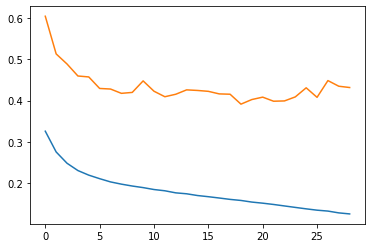

In [ ]:
plt.plot(fitting.history['loss'][:])
plt.plot(fitting.history['val_loss'][:])

El entrenamiento ha parado cuando la validation loss ya no mejoraba.

**Evaluación sobre validation**

---

A continuación, vamos a analizar las siguientes métricas:

**precision**: de los tweets que hemos clasificado como un clase, cuántos realmente los son.    

**recall**: Cuántos tweets de una clase hemos logrado identificar correctamente.

**f1-score**: La media harmónica de **precision** y **recall**

**accuracy**: % de acierto global del modelo. Capacidad de discernir entre clickbait y no clickbait.


Confusion Matrix: 
 [[2511  445]
 [ 224  717]] 

-------------------
Classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      2956
           1       0.62      0.76      0.68       941

    accuracy                           0.83      3897
   macro avg       0.77      0.81      0.78      3897
weighted avg       0.85      0.83      0.83      3897
 
-------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


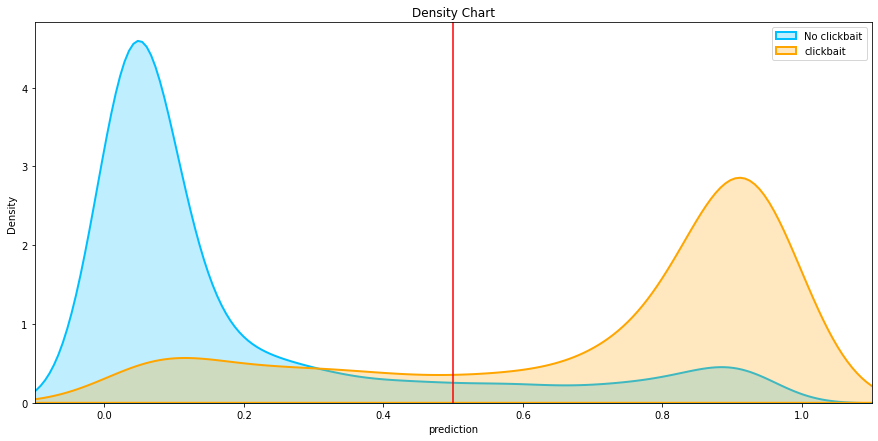

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from termcolor import colored

predicted_proba = clasificador.predict(validation_X)
#thresold modificable
threshold = 0.5
predicted = (predicted_proba >= threshold).astype('int')

#for deaful threshold change param 'predicted' per 'y_pred'
print(colored('\nConfusion Matrix: \n', attrs=['bold']),confusion_matrix(np.array(validation_y[:,0]), predicted),'\n\n-------------------')
print(colored('Classification_report: \n', attrs=['bold']),classification_report(np.array(validation_y[:,0]), predicted),'\n-------------------')
# print(colored('Accuracy: \n', attrs=['bold']),accuracy_score(np.array(validation_y[:,0]), predicted))

data_predicted = pd.DataFrame(columns=['prediction','gt'])
data_predicted['prediction'] = predicted_proba.reshape((len(predicted_proba),))
data_predicted['gt'] = np.array(validation_y[:,0])
data_predicted_0=data_predicted[data_predicted['gt']==0]
data_predicted_1=data_predicted[data_predicted['gt']==1]

f, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(data_predicted_0['prediction'], hist=False, rug=False, bins=100, color='deepskyblue', kde_kws = {'shade': True, 'linewidth': 2}, label='No clickbait')
ax = sns.distplot(data_predicted_1['prediction'], hist=False, rug=False, bins=100, color='orange', kde_kws = {'shade': True, 'linewidth': 2}, label='clickbait')
ax.set_title("Density Chart")
plt.axvline(threshold, 0, color='red')
plt.xlim(-0.1, 1.1)
plt.legend()
plt.show(block=False)

En el density chart, hemos decidido mantener el **umbral=0.5** para no-clickbait/clickbait, ya que hay dos picos claramente diferenciados aunque ambos tienen colas largas. Esto significa que, para los tweets que realmente son clickbait, la mayoría de veces le damos la etiqueta con valores cercanos a 1, pero hay muchos que adquieren valores muy alejados (cola). Lo mismo pasa con la clase no-clickbait.

Para este caso concreto, cerca del 76% de los tweets son no-clickbait. Una solución trivial sería decir que todos los tweets son no-clickbait, con lo que ya obendríamos una *accuracy* del 76%. El modelo tiene una *accuracy* del 83%, de manera que mejora la solución trivial.

Para los tweets **no-clickbat**, obtenemos excelentes valores de **precision**, **recall** y, naturalmente, **F1**. Esto significa que, capturamos casi todos los tweets que son no-clickbait (*recall*) del *validation set* y, además, de los predecidos como no-clickbait, casi todos realmente son no-clickbait (*precision*).

Para los tweets **clickbait**, aunque tenemos buen *recall*, la *precision* es más bien baja.Esto significa que nuestro clasificador clickbait, aunque logra idenficar el 76% de los tweets que realmente son clickbait (*recall*), el 38% de los tweets predecidos como clickbait realmente no lo son (1-*precision*).

Estos resultamos están acorde a otros modelos publicados con anterioridad:
(https://ieeexplore.ieee.org/abstract/document/9617586/metrics#metrics

**Evaluación sobre test**

---


Confusion Matrix: 
 [[12275  2180]
 [  848  3610]] 

-------------------
Classification_report: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     14455
           1       0.62      0.81      0.70      4458

    accuracy                           0.84     18913
   macro avg       0.78      0.83      0.80     18913
weighted avg       0.86      0.84      0.85     18913
 
-------------------
Accuracy: 
 0.8398984825252472


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


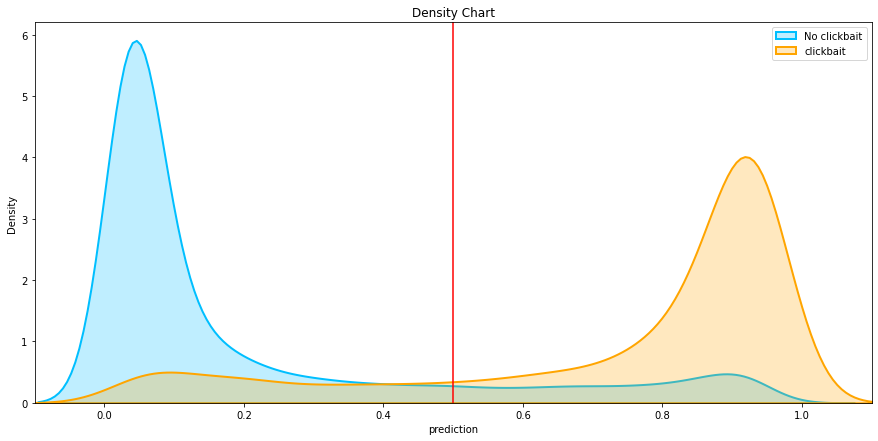

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from termcolor import colored

predicted_proba = clasificador.predict(test_X)
predicted = (predicted_proba >= threshold).astype('int')

#for deaful threshold change param 'predicted' per 'y_pred'
print(colored('\nConfusion Matrix: \n', attrs=['bold']),confusion_matrix(np.array(test_y[:,0]), predicted),'\n\n-------------------')
print(colored('Classification_report: \n', attrs=['bold']),classification_report(np.array(test_y[:,0]), predicted),'\n-------------------')
print(colored('Accuracy: \n', attrs=['bold']),accuracy_score(np.array(test_y[:,0]), predicted))

data_predicted = pd.DataFrame(columns=['prediction','gt'])
data_predicted['prediction'] = predicted_proba.reshape((len(predicted_proba),))
data_predicted['gt'] = np.array(test_y[:,0])
data_predicted_0=data_predicted[data_predicted['gt']==0]
data_predicted_1=data_predicted[data_predicted['gt']==1]

f, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(data_predicted_0['prediction'], hist=False, rug=False, bins=100, color='deepskyblue', kde_kws = {'shade': True, 'linewidth': 2}, label='No clickbait')
ax = sns.distplot(data_predicted_1['prediction'], hist=False, rug=False, bins=100, color='orange', kde_kws = {'shade': True, 'linewidth': 2}, label='clickbait')
ax.set_title("Density Chart")
plt.axvline(threshold, 0, color='red')
plt.xlim(-0.1, 1.1)
plt.legend()
plt.show(block=False)

La evaluación sobre el *test set* arroja resultamos muy similares a los obtenidos en el *validation set*.

Para una discusión más detallada me refiero a lo ya dicho para el *validation set.*

# 2.2. RoBERTa for sequence classification

**Definición del modelo y de los inputs**

---

Vamos a definir dos funciones:

*crear_inputs* va a coger los DataFrames *train* y *test*, los va a pasar por el TOKENIZER que elijamos y nos va a devolver *train_X*, *train_y*, *validation_X*, *validation_y*, *test_X* y *test_y*.

*crear_clasificador_clickbait* crear una red con la arquitectura:

train_X, train_y, validation_X, validation_y, test_X, test_y --> **RoBERTa** --> [CLS] --> **LINEAR LAYER** --> *Sigmoid* --> Output (clase)

In [ ]:
def crear_inputs(train, test, TOKENIZER, frac_val):
  
  train['code'] = np.where(train['truthClass'] == 'clickbait', 1, 0)
  test['code'] = np.where(test['truthClass'] == 'clickbait', 1, 0)

  validation = train.sample(frac=frac_val, random_state=42)
  train = train.drop(validation.index)

  ## Training set
  encoded_tweets = TOKENIZER(train['postText'].to_list(), 
                             return_tensors='tf', 
                             padding="max_length", 
                             truncation=True)
  train_X = [encoded_tweets['input_ids'], 
            #  encoded_tweets['token_type_ids'], 
             encoded_tweets['attention_mask']]

  train_y = tf.convert_to_tensor(np.array(train['code']).reshape(len(train['code']),1))

  ## Validation set
  encoded_tweets = TOKENIZER(validation['postText'].to_list(), 
                             return_tensors='tf', 
                             padding="max_length", 
                             truncation=True)
  validation_X = [encoded_tweets['input_ids'], 
            #  encoded_tweets['token_type_ids'], 
             encoded_tweets['attention_mask']]

  validation_y = tf.convert_to_tensor(np.array(validation['code']).reshape(len(validation['code']),1))


  ## Test set
  encoded_tweets = TOKENIZER(test['postText'].to_list(), 
                             return_tensors='tf', 
                             padding="max_length", 
                             truncation=True)
  test_X =  [encoded_tweets['input_ids'], 
            #  encoded_tweets['token_type_ids'], 
             encoded_tweets['attention_mask']]

  test_y = tf.convert_to_tensor(np.array(test['code']).reshape(len(test['code']),1))
  
  return train_X, train_y, validation_X, validation_y, test_X, test_y

In [ ]:
def crear_clasificador_clickbait(encoder, loss, optimizer):
  
    ## Definimos los inputs (tamaño máximo 512 por el tokenizer)
    input_ids = layers.Input(shape=(512,), dtype=tf.int32, name='input_ids')
    # token_type_ids = layers.Input(shape=(512,), dtype=tf.int32, name='token_type_ids')
    attention_mask = layers.Input(shape=(512,), dtype=tf.int32, name='attention_mask')

    ## Creamos el encoder encoder
    encoder = encoder

    ## Creamos el token CLS codificado
    class_output = encoder(input_ids=input_ids, 
                        # token_type_ids=token_type_ids, 
                        attention_mask=attention_mask, training=True)[0]  # Posición del token [CLS] after pooling

    # # Activamos el output de la capa linear con un sigmoid para obtener la clase
    class_output = layers.Activation(keras.activations.sigmoid, name='sigmoid')(class_output)

    model = keras.Model(
        # inputs=[input_ids, token_type_ids, attention_mask],
        inputs=[input_ids, attention_mask],
        outputs=[class_output],
    )

    ## Compilamos
    model.compile(optimizer=optimizer, loss=loss)

    return model

Como hemos dicho en el punto 2.1., hemos comentado las líneas relacionadas con *token_type_ids*.

**Creamos los inputs**. Hemos escogido que un 20% aleatorio de los tweets en el *training set* serviran como *validation set*.

In [ ]:
train_X, train_y, validation_X, validation_y, test_X, test_y = crear_inputs(train, test, TOKENIZER = RobertaTokenizerFast.from_pretrained("roberta-base"), frac_val=0.2)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

**Creamos el modelo** en función si vamos a usar TPU o no:

In [ ]:
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        # Esta es la linea que tenemos que modificar
        clasificador = crear_clasificador_clickbait(encoder= TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=1), 
                                                     loss = tf.keras.losses.BinaryCrossentropy(),
                                                     optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6),
                                                     )
else:
    # Esta es la linea que tenemos que modificar
    clasificador = crear_clasificador_clickbait(encoder= TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=1), 
                                                 loss = tf.keras.losses.BinaryCrossentropy(),
                                                 optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6),
                                                 )

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.36.203.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.36.203.226:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Un resumen de la red que acabamos de crear:

In [ ]:
clasificador.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 tf_roberta_for_sequence_classi  TFSequenceClassifie  124646401  ['input_ids[0][0]',              
 fication_1 (TFRobertaForSequen  rOutput(loss=None,               'attention_mask[0][0]']         
 ceClassification)              logits=(None, 1),                                                 
                                 hidden_states=None                                           

Por el tipo de encoder que estamos cargando, la capa *linear* que ejecuta la clasificación está integrada en el mismo encoder. En caso de que quisiésemos usar un encoder sin el *classification head*, habría que añadírselo en la función *crear_clasificador_clickbait*, como veremos en el punto 2.3.

**Entrenamiento**

---

Antes de entrenar el modelo, vamos a monitorizar la *validation loss*, de manera que el entrenamiento se pare si en las 10 *epochs* siguientes no consigue mejorarla.

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=True
)

¡A entrenar! Para ello, hemos añadido diferentes pesos a las clases para "balancear" la proporción de las clases. Las clases 0 (no clickbait) y 1 (clickbait) van a tener un peso inversamente proporcional.

In [ ]:
fitting = clasificador.fit(
    x=train_X,
    y=train_y,
    batch_size=128,
    epochs=50,
    validation_data=(validation_X, validation_y),
    callbacks=[early_stopping_monitor],
    class_weight={0: len(train[train['code'] == 1]) / len(train[train['code'] == 0]),
                  1: 1.}
)

Epoch 1/50
122/122 [==============================] - 230s 1s/step - loss: 0.3347 - val_loss: 0.6827
Epoch 2/50
122/122 [==============================] - 64s 525ms/step - loss: 0.2857 - val_loss: 0.4943
Epoch 3/50
122/122 [==============================] - 64s 526ms/step - loss: 0.2126 - val_loss: 0.4369
Epoch 4/50
122/122 [==============================] - 64s 526ms/step - loss: 0.1980 - val_loss: 0.4121
Epoch 5/50
122/122 [==============================] - 64s 526ms/step - loss: 0.1902 - val_loss: 0.4066
Epoch 6/50
122/122 [==============================] - 62s 512ms/step - loss: 0.1857 - val_loss: 0.4107
Epoch 7/50
122/122 [==============================] - 65s 531ms/step - loss: 0.1804 - val_loss: 0.4027
Epoch 8/50
122/122 [==============================] - 64s 527ms/step - loss: 0.1765 - val_loss: 0.3940
Epoch 9/50
122/122 [==============================] - 62s 512ms/step - loss: 0.1741 - val_loss: 0.4209
Epoch 10/50
122/122 [==============================] - 62s 512ms/step - los

Después de entrenar, queremos predecir clases en el validation y en el test. Para ellos, debemos decirle al clasificador que ya no está funcionando en *training mode*. Esto es una particularidad de algunas redes neuronales.

In [ ]:
clasificador.training=False

Veamos el aspecto de la *training loss* y la *validation loss*

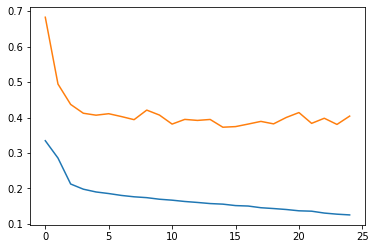

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fitting.history['loss'][:])
plt.plot(fitting.history['val_loss'][:])

El entrenamiento ha parado cuando el validation loss ya no mejoraba.

**Evaluación sobre validation**

---

A continuación, vamos a analizar las siguientes métricas:

**precision**: de los tweets que hemos clasificado como un clase, cuántos realmente los son.    

**recall**: Cuántos tweets de una clase hemos logrado identificar correctamente.

**f1-score**: La media harmónica de **precision** y **recall**

**accuracy**: % de acierto global del modelo. Capacidad de discernir entre clickbait y no clickbait.


Confusion Matrix: 
 [[2486  470]
 [ 183  758]] 

-------------------
Classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      2956
           1       0.62      0.81      0.70       941

    accuracy                           0.83      3897
   macro avg       0.77      0.82      0.79      3897
weighted avg       0.86      0.83      0.84      3897
 
-------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


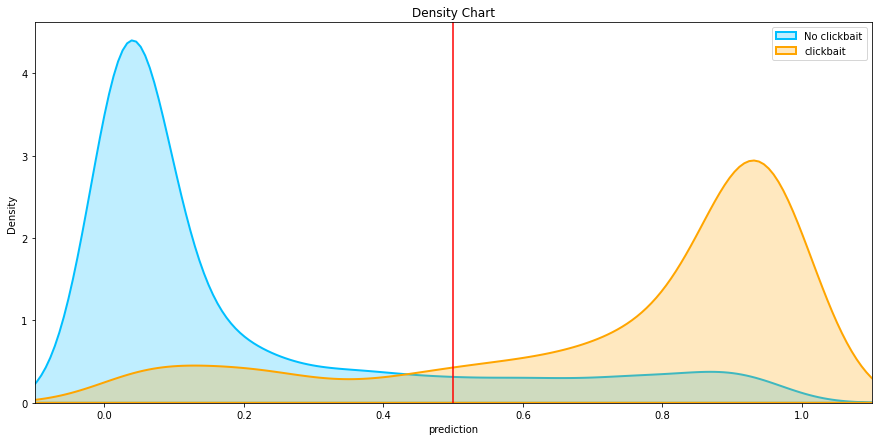

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from termcolor import colored

predicted_proba = clasificador.predict(validation_X)
#thresold modificable
threshold = 0.5
predicted = (predicted_proba >= threshold).astype('int')

#for deaful threshold change param 'predicted' per 'y_pred'
print(colored('\nConfusion Matrix: \n', attrs=['bold']),confusion_matrix(np.array(validation_y[:,0]), predicted),'\n\n-------------------')
print(colored('Classification_report: \n', attrs=['bold']),classification_report(np.array(validation_y[:,0]), predicted),'\n-------------------')
# print(colored('Accuracy: \n', attrs=['bold']),accuracy_score(np.array(validation_y[:,0]), predicted))

data_predicted = pd.DataFrame(columns=['prediction','gt'])
data_predicted['prediction'] = predicted_proba.reshape((len(predicted_proba),))
data_predicted['gt'] = np.array(validation_y[:,0])
data_predicted_0=data_predicted[data_predicted['gt']==0]
data_predicted_1=data_predicted[data_predicted['gt']==1]

f, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(data_predicted_0['prediction'], hist=False, rug=False, bins=100, color='deepskyblue', kde_kws = {'shade': True, 'linewidth': 2}, label='No clickbait')
ax = sns.distplot(data_predicted_1['prediction'], hist=False, rug=False, bins=100, color='orange', kde_kws = {'shade': True, 'linewidth': 2}, label='clickbait')
ax.set_title("Density Chart")
plt.axvline(threshold, 0, color='red')
plt.xlim(-0.1, 1.1)
plt.legend()
plt.show(block=False)

En el density chart, hemos decidido mantener el **umbral=0.5** para no-clickbait/clickbait, ya que hay dos picos claramente diferenciados aunque ambos tienen colas largas. Esto significa que, para los tweets que realmente son clickbait, la mayoría de veces le damos la etiqueta con valores cercanos a 1, pero hay muchos que adquieren valores muy alejados (cola). Lo mismo pasa con la clase no-clickbait.

Para este caso concreto, cerca del 76% de los tweets son no-clickbait. Una solución trivial sería decir que todos los tweets son no-clickbait, con lo que ya obendríamos una *accuracy* del 76%. El modelo tiene una *accuracy* del 83%, de manera que mejora la solución trivial.

Para los tweets **no-clickbat**, obtenemos excelentes valores de **precision**, **recall** y, naturalmente, **F1**. Esto significa que, capturamos casi todos los tweets que son no-clickbait (*recall*) del *validation set* y, además, de los predecidos como no-clickbait, casi todos realmente son no-clickbait (*precision*).

Para los tweets **clickbait**, aunque tenemos buen *recall*, la *precision* es más bien baja.Esto significa que nuestro clasificador clickbait, aunque logra idenficar el 81% de los tweets que realmente son clickbait (*recall*), el 38% de los tweets predecidos como clickbait realmente no lo son (1-*precision*).

Estos resultamos están acorde a otros modelos publicados con anterioridad:
(https://ieeexplore.ieee.org/abstract/document/9617586/metrics#metrics

**Evaluación sobre test**

---


Confusion Matrix: 
 [[12161  2294]
 [  717  3741]] 

-------------------
Classification_report: 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     14455
           1       0.62      0.84      0.71      4458

    accuracy                           0.84     18913
   macro avg       0.78      0.84      0.80     18913
weighted avg       0.87      0.84      0.85     18913
 
-------------------
Accuracy: 
 0.8407973351662877


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


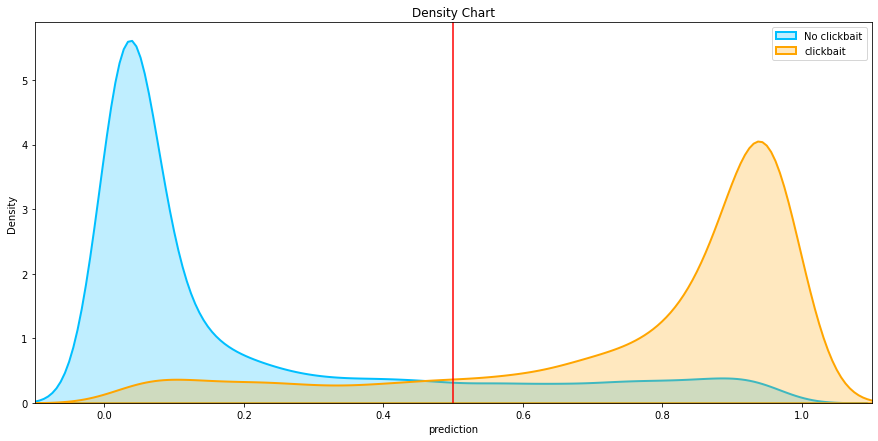

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from termcolor import colored

predicted_proba = clasificador.predict(test_X)
predicted = (predicted_proba >= threshold).astype('int')

#for deaful threshold change param 'predicted' per 'y_pred'
print(colored('\nConfusion Matrix: \n', attrs=['bold']),confusion_matrix(np.array(test_y[:,0]), predicted),'\n\n-------------------')
print(colored('Classification_report: \n', attrs=['bold']),classification_report(np.array(test_y[:,0]), predicted),'\n-------------------')
print(colored('Accuracy: \n', attrs=['bold']),accuracy_score(np.array(test_y[:,0]), predicted))

data_predicted = pd.DataFrame(columns=['prediction','gt'])
data_predicted['prediction'] = predicted_proba.reshape((len(predicted_proba),))
data_predicted['gt'] = np.array(test_y[:,0])
data_predicted_0=data_predicted[data_predicted['gt']==0]
data_predicted_1=data_predicted[data_predicted['gt']==1]

f, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(data_predicted_0['prediction'], hist=False, rug=False, bins=100, color='deepskyblue', kde_kws = {'shade': True, 'linewidth': 2}, label='No clickbait')
ax = sns.distplot(data_predicted_1['prediction'], hist=False, rug=False, bins=100, color='orange', kde_kws = {'shade': True, 'linewidth': 2}, label='clickbait')
ax.set_title("Density Chart")
plt.axvline(threshold, 0, color='red')
plt.xlim(-0.1, 1.1)
plt.legend()
plt.show(block=False)

La evaluación sobre el *test set* arroja resultamos muy similares a los obtenidos en el *validation set*.

Para una discusión más detallada me refiero a lo ya dicho para el *validation set.*

# 2.3. BERT + Customized Classification Head

**Definición del modelo y de los inputs**

---

Vamos a definir dos funciones:

*crear_inputs* va a coger los DataFrames *train* y *test*, los va a pasar por el TOKENIZER que elijamos y nos va a devolver *train_X*, *train_y*, *validation_X*, *validation_y*, *test_X* y *test_y*

*crear_clasificador_clickbait* crear una red con la arquitectura:

train_X, train_y, validation_X, validation_y, test_X, test_y --> **Bert** --> [CLS] --> **Custom LINEAR LAYER** --> *Sigmoid* --> Output (clase)

In [ ]:
def crear_inputs(train, test, TOKENIZER, frac_val):
  
  train['code'] = np.where(train['truthClass'] == 'clickbait', 1, 0)
  test['code'] = np.where(test['truthClass'] == 'clickbait', 1, 0)

  validation = train.sample(frac=frac_val, random_state=42)
  train = train.drop(validation.index)

  ## Training set
  encoded_tweets = TOKENIZER(train['postText'].to_list(), 
                             return_tensors='tf', 
                             padding="max_length", 
                             truncation=True)
  train_X = [encoded_tweets['input_ids'], 
             encoded_tweets['token_type_ids'], 
             encoded_tweets['attention_mask']]

  train_y = tf.convert_to_tensor(np.array(train['code']).reshape(len(train['code']),1))

  ## Validation set
  encoded_tweets = TOKENIZER(validation['postText'].to_list(), 
                             return_tensors='tf', 
                             padding="max_length", 
                             truncation=True)
  validation_X = [encoded_tweets['input_ids'], 
             encoded_tweets['token_type_ids'], 
             encoded_tweets['attention_mask']]

  validation_y = tf.convert_to_tensor(np.array(validation['code']).reshape(len(validation['code']),1))


  ## Test set
  encoded_tweets = TOKENIZER(test['postText'].to_list(), 
                             return_tensors='tf', 
                             padding="max_length", 
                             truncation=True)
  test_X =  [encoded_tweets['input_ids'], 
             encoded_tweets['token_type_ids'], 
             encoded_tweets['attention_mask']]

  test_y = tf.convert_to_tensor(np.array(test['code']).reshape(len(test['code']),1))
  
  return train_X, train_y, validation_X, validation_y, test_X, test_y

In [ ]:
def crear_clasificador_clickbait(encoder, loss, optimizer, kernel_regularizer):
  
    ## Definimos los inputs (tamaño máximo 512 por el tokenizer)
    input_ids = layers.Input(shape=(512,), dtype=tf.int32, name='input_ids')
    token_type_ids = layers.Input(shape=(512,), dtype=tf.int32, name='token_type_ids')
    attention_mask = layers.Input(shape=(512,), dtype=tf.int32, name='attention_mask')

    ## Creamos el encoder encoder
    encoder = encoder

    ## Creamos el token CLS codificado
    class_output = encoder(input_ids=input_ids, 
                        token_type_ids=token_type_ids, 
                        attention_mask=attention_mask, training=True)[1]  # Posición del token [CLS] after pooling

    # # Activamos el output de la capa linear con un sigmoid para obtener la clase
    class_output = layers.Dense(64, name='Linear1', activation='relu', kernel_regularizer=kernel_regularizer)(class_output)
    # class_output = layers.Dropout(0.4)(class_output)
    class_output = layers.Dense(1, name='Linear2', activation='sigmoid', kernel_regularizer=kernel_regularizer)(class_output)

    model = keras.Model(
        inputs=[input_ids, token_type_ids, attention_mask],
        outputs=[class_output],
    )

    ## Compilamos
    model.compile(optimizer=optimizer, loss=loss)

    return model

De estas dos funciones, es posible que, según el *tokenizer* que escojamos haya que comentar algunas lineas. Por ejemplo, el tokenizer de RoBERTa, sólo saca como output "input_ids" y "attention_mask". Así pues, las lineas relacionadas con "token_type_ids" habría que comentarlas.

Como hemos dicho en los puntos anteriores, hemos añadido un customized classification head que consiste en una primera capa *linear* con 64 neuronas y activación "relu" y una segunda capa *linear* con una única neurona y activación "sigmoid".

Ambas capas aplican regularización L1 con lambda = 0.01.

**Creamos los inputs**. Hemos escogido que un 20% aleatorio de los tweets en el training set serviran como *validation set*.

In [ ]:
train_X, train_y, validation_X, validation_y, test_X, test_y = crear_inputs(train, test, TOKENIZER = BertTokenizerFast.from_pretrained("bert-base-uncased"), frac_val=0.2)

**Creamos el modelo** en función si vamos a usar TPU o no:

In [ ]:
if use_tpu:
  # Create distribution strategy
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
  strategy = tf.distribute.TPUStrategy(tpu)

  # Create model
  with strategy.scope():
      # Esta es la linea que tenemos que modificar
      clasificador = crear_clasificador_clickbait(encoder=TFBertModel.from_pretrained('bert-base-uncased', num_labels=1), 
                                                  loss = tf.keras.losses.BinaryCrossentropy(),
                                                  kernel_regularizer = tf.keras.regularizers.l1(l1=0.01),
                                                  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5),
                                                 )
else:
    # Esta es la linea que tenemos que modificar
  clasificador = crear_clasificador_clickbait(encoder=TFBertModel.from_pretrained('bert-base-uncased', num_labels=1), 
                                              loss = tf.keras.losses.BinaryCrossentropy(),
                                              kernel_regularizer = tf.keras.regularizers.l1(l1=0.01),
                                              optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5),
                                              )

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.17.74.58:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.17.74.58:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Un resumen de la red que acabamos de crear:

In [ ]:
clasificador.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]',   

Esta vez, como anunciamos en los puntos 2.1 y 2.2, hemos añadido un classification head customizado.

**Entrenamiento**

---

Antes de entrenar el modelo, vamos a monitorizar la *validation loss*, de manera que el entrenamiento se pare si en las 10 *epochs* siguientes no consigue mejorarla.

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=True
)

¡A entrenar! Para ello, hemos añadido diferentes pesos a las clases para "balancear" la proporción de las clases. Las clases 0 (no clickbait) y 1 (clickbait) van a tener un peso inversamente proporcional.

In [ ]:
fitting = clasificador.fit(
    x=train_X,
    y=train_y,
    batch_size=128,
    epochs=300,
    validation_data=(validation_X, validation_y),
    callbacks=[early_stopping_monitor],
    class_weight={0: len(train[train['code'] == 1]) / len(train[train['code'] == 0]),
                  1: 1.}
)

Epoch 1/300
122/122 [==============================] - 234s 1s/step - loss: 20.9334 - val_loss: 20.7759
Epoch 2/300
122/122 [==============================] - 63s 517ms/step - loss: 20.3000 - val_loss: 20.1920
Epoch 3/300
122/122 [==============================] - 62s 512ms/step - loss: 19.6983 - val_loss: 19.6606
Epoch 4/300
122/122 [==============================] - 63s 520ms/step - loss: 19.1063 - val_loss: 19.1514
Epoch 5/300
122/122 [==============================] - 63s 513ms/step - loss: 18.5216 - val_loss: 18.5527
Epoch 6/300
122/122 [==============================] - 63s 514ms/step - loss: 17.9448 - val_loss: 18.0101
Epoch 7/300
122/122 [==============================] - 63s 515ms/step - loss: 17.3841 - val_loss: 17.4868
Epoch 8/300
122/122 [==============================] - 62s 512ms/step - loss: 16.8313 - val_loss: 16.9911
Epoch 9/300
122/122 [==============================] - 62s 512ms/step - loss: 16.2907 - val_loss: 16.5373
Epoch 10/300
122/122 [==========================

Después de entrenar, queremos predecir clases en el validation y en el test. Para ellos, debemos decirle al clasificador que ya no está funcionando en *training mode*. Esto es una particularidad de algunas redes neuronales.

In [ ]:
clasificador.training=False

Veamos el aspecto de la *training loss* y la *validation loss*

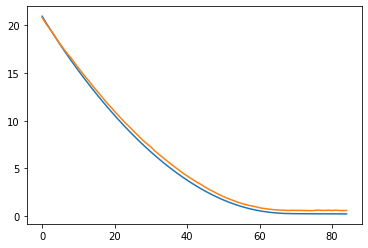

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fitting.history['loss'][:])
plt.plot(fitting.history['val_loss'][:])

El entrenamiento ha parado cuando el validation loss ya no mejoraba.

**Evaluación sobre validation**

---

A continuación, vamos a analizar las siguientes métricas:

**precision**: de los tweets que hemos clasificado como un clase, cuántos realmente los son.    

**recall**: Cuántos tweets de una clase hemos logrado identificar correctamente.

**f1-score**: La media harmónica de **precision** y **recall**

**accuracy**: % de acierto global del modelo. Capacidad de discernir entre clickbait y no clickbait.


Confusion Matrix: 
 [[2711  245]
 [ 354  587]] 

-------------------
Classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2956
           1       0.71      0.62      0.66       941

    accuracy                           0.85      3897
   macro avg       0.80      0.77      0.78      3897
weighted avg       0.84      0.85      0.84      3897
 
-------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


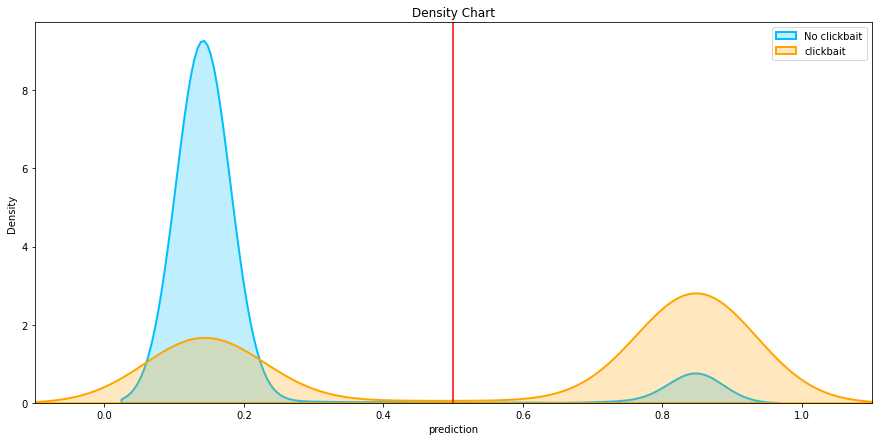

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from termcolor import colored

predicted_proba = clasificador.predict(validation_X)
#thresold modificable
threshold = 0.5
predicted = (predicted_proba >= threshold).astype('int')

#for deaful threshold change param 'predicted' per 'y_pred'
print(colored('\nConfusion Matrix: \n', attrs=['bold']),confusion_matrix(np.array(validation_y[:,0]), predicted),'\n\n-------------------')
print(colored('Classification_report: \n', attrs=['bold']),classification_report(np.array(validation_y[:,0]), predicted),'\n-------------------')
# print(colored('Accuracy: \n', attrs=['bold']),accuracy_score(np.array(validation_y[:,0]), predicted))

data_predicted = pd.DataFrame(columns=['prediction','gt'])
data_predicted['prediction'] = predicted_proba.reshape((len(predicted_proba),))
data_predicted['gt'] = np.array(validation_y[:,0])
data_predicted_0=data_predicted[data_predicted['gt']==0]
data_predicted_1=data_predicted[data_predicted['gt']==1]

f, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(data_predicted_0['prediction'], hist=False, rug=False, bins=100, color='deepskyblue', kde_kws = {'shade': True, 'linewidth': 2}, label='No clickbait')
ax = sns.distplot(data_predicted_1['prediction'], hist=False, rug=False, bins=100, color='orange', kde_kws = {'shade': True, 'linewidth': 2}, label='clickbait')
ax.set_title("Density Chart")
plt.axvline(threshold, 0, color='red')
plt.xlim(-0.1, 1.1)
plt.legend()
plt.show(block=False)

En el density chart, hemos decidido mantener el **umbral=0.5** para no-clickbait/clickbait. Este modelo es muy preciso, ya que ambas clases están muy bien acotadas en los mismos valores, pero tiene un *recall* modesto.

Para este caso concreto, cerca del 76% de los tweets son no-clickbait. Una solución trivial sería decir que todos los tweets son no-clickbait, con lo que ya obendríamos una *accuracy* del 76%. El modelo tiene una *accuracy* del 85%, de manera que mejora la solución trivial.

Para los tweets **no-clickbat**, obtenemos excelentes valores de **precision**, **recall** y, naturalmente, **F1**. Esto significa que, capturamos casi todos los tweets que son no-clickbait (*recall*) del *validation set* y, además, de los predecidos como no-clickbait, casi todos realmente son no-clickbait (*precision*).

Para los tweets **clickbait**, aunque tenemos buena *precision*, el *recall* es más bien bajo. Esto significa que nuestro clasificador clickbait es bastante fiable cuando dice que un tweet es clickbait, pero puede pasar por alto bastantes tweets clickbait.

Estos resultamos están acorde a otros modelos publicados con anterioridad:
(https://ieeexplore.ieee.org/abstract/document/9617586/metrics#metrics

**Evaluación sobre test**

---


Confusion Matrix: 
 [[13213  1242]
 [ 1512  2946]] 

-------------------
Classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     14455
           1       0.70      0.66      0.68      4458

    accuracy                           0.85     18913
   macro avg       0.80      0.79      0.79     18913
weighted avg       0.85      0.85      0.85     18913
 
-------------------
Accuracy: 
 0.8543858721514302


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


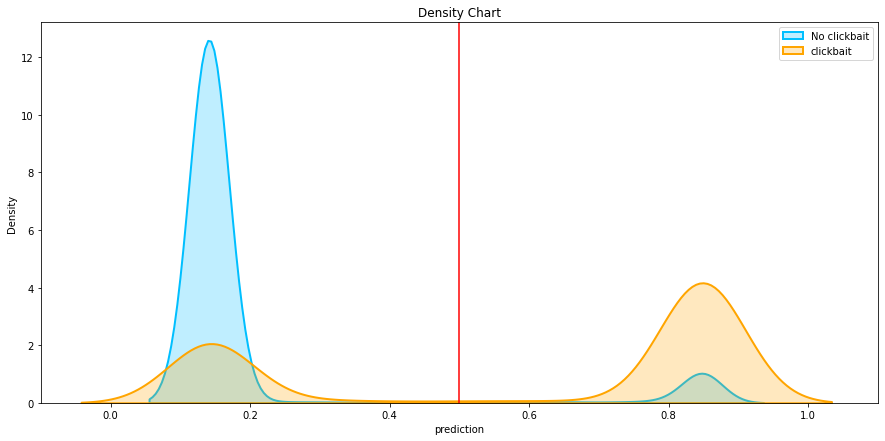

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from termcolor import colored

predicted_proba = clasificador.predict(test_X)
predicted = (predicted_proba >= threshold).astype('int')

#for deaful threshold change param 'predicted' per 'y_pred'
print(colored('\nConfusion Matrix: \n', attrs=['bold']),confusion_matrix(np.array(test_y[:,0]), predicted),'\n\n-------------------')
print(colored('Classification_report: \n', attrs=['bold']),classification_report(np.array(test_y[:,0]), predicted),'\n-------------------')
print(colored('Accuracy: \n', attrs=['bold']),accuracy_score(np.array(test_y[:,0]), predicted))

data_predicted = pd.DataFrame(columns=['prediction','gt'])
data_predicted['prediction'] = predicted_proba.reshape((len(predicted_proba),))
data_predicted['gt'] = np.array(test_y[:,0])
data_predicted_0=data_predicted[data_predicted['gt']==0]
data_predicted_1=data_predicted[data_predicted['gt']==1]

f, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(data_predicted_0['prediction'], hist=False, rug=False, bins=100, color='deepskyblue', kde_kws = {'shade': True, 'linewidth': 2}, label='No clickbait')
ax = sns.distplot(data_predicted_1['prediction'], hist=False, rug=False, bins=100, color='orange', kde_kws = {'shade': True, 'linewidth': 2}, label='clickbait')
ax.set_title("Density Chart")
plt.axvline(threshold, 0, color='red')
plt.xlim(-0.1, 1.1)
plt.legend()
plt.show(block=False)

La evaluación sobre el *test set* arroja resultamos muy similares a los obtenidos en el *validation set*.

Para una discusión más detallada me refiero a lo ya dicho para el *validation set.*

Dado que este modelo no genera colas largas para las dos clases, es interesante ver cómo son los tweets en los que falla o acierta cada clase.

Veamos primero cómo son los tweets que realmente son clickbait:

In [ ]:
from IPython.display import display_html 
df1 = test[(np.reshape(predicted,(predicted.shape[0],)) == 0) & (np.array(test_y[:,0]) == 1)].head(20)
df2 = test[(np.reshape(predicted,(predicted.shape[0],)) == 1) & (np.array(test_y[:,0]) == 1)].head(20)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Predicción: No-clickbait')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Predicción: Clickbait')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,postText,truthClass,code
7,Stars who got their start on soap operas,clickbait,1
29,"Congratulations, Kalpit Veerval 👏",clickbait,1
32,Jealous wife chops off her husband's PENIS with a pair of scissors after growing 'tired of his womanising',clickbait,1
36,thank goodness the rnc gets it,clickbait,1
51,Latest Uber controversy sheds light on how companies use your emails:,clickbait,1
62,"""Why is Bill Clinton given a pass over the other Bills?""",clickbait,1
76,Cheeky marathon runner soaks the future king of England,clickbait,1
81,"Guys, the new “Zelda” game is so freakin’ fun",clickbait,1
85,What the French elections mean for Brexit,clickbait,1
86,Did Von Miller wear a better Coachella outfit than Cam Newton? 🤔,clickbait,1


Veamos ahora cómo son los tweets que realmente no son clickbait:

In [ ]:
df1 = test[(np.reshape(predicted,(predicted.shape[0],)) == 1) & (np.array(test_y[:,0]) == 0)].head(20)
df2 = test[(np.reshape(predicted,(predicted.shape[0],)) == 0) & (np.array(test_y[:,0]) == 0)].head(20)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Predicción: Clickbait')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Predicción: No-clickbait')

display_html(df2_styler._repr_html_()+df1_styler._repr_html_(), raw=True)

,postText,truthClass,code
0,"Johnny Manziel on Browns' No. 1 pick Myles Garrett: ""He'll do wonders for the team"" 🎥:",no-clickbait,0
1,Fabio: California Is a 'Mess' Because of Liberal Policies,no-clickbait,0
3,New Bears quarterback Mitchell Trubisky was greeted with some boos at his first public appearance.,no-clickbait,0
4,It's not enough to let employees work flexible schedules if they're still afraid to ask,no-clickbait,0
5,"Out of 15 lakh registered companies in India, 9 lakh don't file returns!",no-clickbait,0
8,"President Donald Trump: My first 100 days are ""just about the most successful"" in US history",no-clickbait,0
9,"U.S. wants more U.N. sanctions over North Korea’s nuclear arms, warns time is short",no-clickbait,0
12,DMX reportedly enters rehab,no-clickbait,0
15,"Ariana Grande & Cashmere Cat have teamed up for a third time with ""Quit""",no-clickbait,0
16,Macron’s rise shows that extremism – whether left or right – is not inevitable,no-clickbait,0


Podemos ver en el lado derecho, los tweets predecidos como clickbait (los 20 primeros). Realmente, salvo algunas excepciones, todos están escritos de manera similar, así que parece razonable que el modelo los confunda.

En el lado izquierdo, los que se han predecido como no-clickbait (los 20 primeros). Podemos ver en las tablas que los que ha predecido erroneamente, parecen ejemplos más o menos claros de clickbait. El error puede ser debido a que ha visto muchos más tweets no-clickbait que clickbait. Aunque hemos intentado solucionar este problema dándole diferentes pesos a cada clase, es posible que no sea suficiente. También, es posible que aumentando el dataset mejore el *recall*.

# **3. Conclusiones**

Los modelos Bert for Sequence Classification y RoBERTa for Sequence Classification arrojan resultados prácticamente idénticos. En el caso de los tweets clickbait, obtenemos un buen *recall*, pero una *precision* modesta. Ambos modelos tienen tasa de acierto (*accuracy*) del 83-84%, mejorando sustancialmente el umbral de la solución trivial (76%).

Un tercer modelo con un *classification head* customizado obtiene una *accuracy* del 85%. Este modelo obtiene una mejor *precision* que los dos modelos anteriores, no obstante, obtiene un peor *recall*.

La métrica F1 es muy similar para los tres modelos en cuanto a detección de la clase "clickbait". Así pues, la elección del mejor modelo dependerá del objetivo: BERT y RoBERTa for sequence classification para capturar los máximos clickbaits posibles (aunque también a costa de capturar muchos no-clickbait) o bien BERT + Custom Classification Head para asegurar que los tweets que predecimos que son clickbait, realmente lo son (aunque a costa de pasar por alto otros).

**Posibles mejoras de los modelos**

Para mejorar los modelos, más allá de incrementar el dataset, sería interesante no limitar la clasificación al token de clasificación, si no al tweet entero.

Además, considero importante no sólo tener en cuenta el *postText*, si no considerar también el título de la noticia que se ha compartido. Mientras que el *postText* puede ser más bien neutro, el título de la noticia que se ha compartido podría llevar fórmulas de clickbait tan evidentes como "lo que pasó a continuación te sorprenderá".